In [1]:
import matplotlib.pyplot as plt
import sacc
import numpy as np


In [2]:
path = '../data_vectors/cosmodc2/7sbins/'
file_real = 'twopoint_data_real.sacc' 

In [3]:
s = sacc.Sacc.load_fits(path + file_real)

In [4]:
nzs_l = []
nzs_s = []
for tracername in s.tracers:
    tracer = s.get_tracer(tracername)
    if 'lens' in tracername:
        z_l = tracer.z
        nzs_l.append(tracer.nz)
    if 'source' in tracername:
        z_s = tracer.z
        nzs_s.append(tracer.nz)

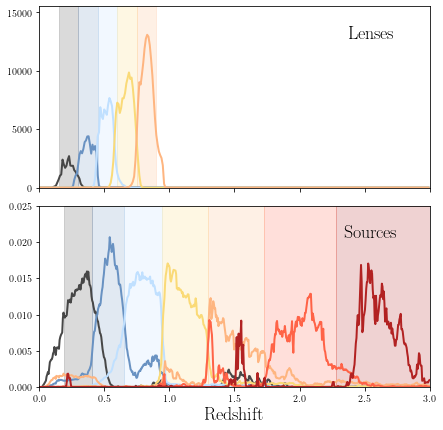

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharey=False, sharex=True)
plt.subplots_adjust(hspace = 0.1, wspace = 0)
#c = ["#FEB580", "#FADA77","#C0E0FF","#6992C2","#474747"]
c = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick']
zbins_l = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9] 
zbins_s = [0.19285902, 0.40831394, 0.65503818, 0.94499109, 1.2947086, 1.72779632, 2.27855242, 3. ]  # 7 bins
#zbins_s = [0.25588604, 0.55455363, 0.91863365, 1.38232001, 2.] # 4 bins
fs = 15
#plt.xticks(fontsize = fs)
#plt.yticks(fontsize = fs)

plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

#ax[0].tick_params(axis='x', Labelsize= fs)

for i,nz in enumerate(nzs_l):
    
    ax[0].plot(z_l, nz, color = c[i], lw = 2.)
    ax[0].set_ylim(ymin=0, ymax = 15500)
    ax[0].set_xlim(xmin=0, xmax = 3.)
    
    ax[0].axvspan(zbins_l[i], zbins_l[i+1], color = c[i], alpha = 0.2)
ax[0].text(0.85, 0.85, "Lenses", horizontalalignment='center',
                            verticalalignment='center', transform=ax[0].transAxes, fontsize=18)
    

for i,nz in enumerate(nzs_s):
    ax[1].plot(z_s, nz, color = c[i], lw = 2.)
    ax[1].set_ylim(ymin=0, ymax = 0.025)
    ax[1].set_xlabel('Redshift', fontsize=18)
    ax[1].axvspan(zbins_s[i], zbins_s[i+1], color = c[i], alpha = 0.2)
ax[1].text(0.85, 0.85, "Sources", horizontalalignment='center',
                              verticalalignment='center', transform=ax[1].transAxes, fontsize=18)

plt.savefig('../plots/nzs_%dsbins.png'%(len(zbins_s)-1), pad_inches = 0.1, dpi = 300)
plt.savefig('../plots/nzs_%dsbins.pdf'%(len(zbins_s)-1), pad_inches = 0.1, dpi = 300)

## Save redshift files for CosmoCov code

In [4]:
z_nzs_l = []
z_nzs_s = []

# get the lower edge of the histogram since that's what cosmocov takes
z_l = z_l - (z_l[2]-z_l[1])/2.
z_s = z_s - (z_s[2]-z_s[1])/2.

z_nzs_l.append(z_l)
z_nzs_s.append(z_s)

for tracername in s.tracers:
    tracer = s.get_tracer(tracername)
    if 'lens' in tracername:
        z_nzs_l.append(tracer.nz)
    if 'source' in tracername:
        z_nzs_s.append(tracer.nz)

NameError: name 'z_l' is not defined

In [36]:
np.savetxt(path + 'lens_cosmodc2_redmagic_5bins.nz', np.array(z_nzs_l).T)
np.savetxt(path + 'source_cosmodc2_7bins.nz', np.array(z_nzs_s).T)

## Plot SRD nzs

In [6]:
lens = np.loadtxt('../generation_gaussian_sims/srd_nzs/nz_y1_lens_5bins_srd.txt').T
source = np.loadtxt('../generation_gaussian_sims/srd_nzs/nz_y1_srcs_5bins_srd.txt').T

In [9]:
z_l = lens[0]
z_s = source[0]
nzs_l = lens[1:]
nzs_s = source[1:]

In [8]:
source

array([[5.00000000e-04, 1.50000000e-03, 2.50000000e-03, ...,
        6.99750000e+00, 6.99850000e+00, 6.99950000e+00],
       [2.29232248e-03, 2.43346663e-03, 2.67394408e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

0.31034576289612437
0.5018051414604028
0.6981932003848508
0.8961473166190616
1.0951633878564269
0.30746380879875884
0.49339120546632964
0.6909210602336794
0.9568923384153794
1.5855558200368616


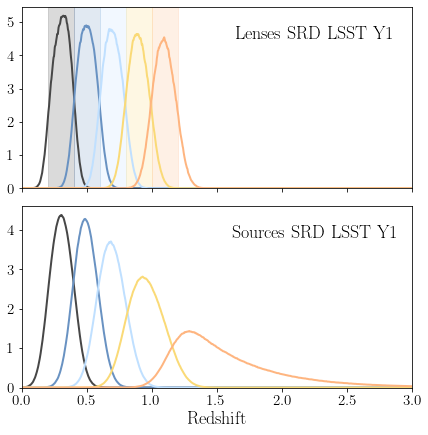

In [38]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharey=False, sharex=True)
plt.subplots_adjust(hspace = 0.1, wspace = 0)
#c = ["#FEB580", "#FADA77","#C0E0FF","#6992C2","#474747"]
c = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick', 'k' ]
zbins_l = [0.2, 0.4, 0.6, 0.8, 1., 1.2] 
zbins_s = [0.19285902, 0.40831394, 0.65503818, 0.94499109, 1.2947086, 1.72779632, 2.27855242, 3. ]  # 7 bins
#zbins_s = [0.25588604, 0.55455363, 0.91863365, 1.38232001, 2.] # 4 bins
fs = 15
#plt.xticks(fontsize = fs)
#plt.yticks(fontsize = fs)

plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

#ax[0].tick_params(axis='x', Labelsize= fs)

for i,nz in enumerate(nzs_l):
    zmean = np.trapz(nz*z_l, x=z_l)
    print(zmean)
    ax[0].plot(z_l, nz, color = c[i], lw = 2.)
    ax[0].set_ylim(ymin=0)
    ax[0].set_xlim(xmin=0, xmax = 3.)    
    ax[0].axvspan(zbins_l[i], zbins_l[i+1], color = c[i], alpha = 0.2)
ax[0].text(0.75, 0.85, "Lenses SRD LSST Y1", horizontalalignment='center',
                            verticalalignment='center', transform=ax[0].transAxes, fontsize=18)
    

for i,nz in enumerate(nzs_s):
    zmean = np.trapz(nz*z_s, x=z_s)
    print(zmean)
    ax[1].plot(z_s, nz, color = c[i], lw = 2.)
    ax[1].set_ylim(ymin=0)
    ax[1].set_xlabel('Redshift', fontsize=18)
    #ax[1].axvspan(zbins_s[i], zbins_s[i+1], color = c[i], alpha = 0.2)
ax[1].text(0.75, 0.85, "Sources SRD LSST Y1", horizontalalignment='center',
                              verticalalignment='center', transform=ax[1].transAxes, fontsize=18)

plt.savefig('../plots/nzs_srd.png', pad_inches = 0.1, dpi = 300)
plt.savefig('../plots/nzs_srd.pdf', pad_inches = 0.1, dpi = 300)

## Plot SRD nzs and CosmoDC2


In [42]:
# CosmoDC2
dir = '../data_vectors/cosmodc2/2022/star_sample/Sep14/pixel_based/'
s = sacc.Sacc.load_fits(dir + 'twopoint_data_real.sacc')

nzs_l_c = []
nzs_s_c = []
for tracername in s.tracers:
    tracer = s.get_tracer(tracername)
    if 'lens' in tracername:
        z_l_c = tracer.z
        nzs_l_c.append(tracer.nz)
    if 'source' in tracername:
        z_s_c = tracer.z
        nzs_s_c.append(tracer.nz)

# SRD
lens = np.loadtxt('../generation_gaussian_sims/srd_nzs/nz_y1_lens_5bins_srd.txt').T
source = np.loadtxt('../generation_gaussian_sims/srd_nzs/nz_y1_srcs_5bins_srd.txt').T        
        
z_l = lens[0]
z_s = source[0]
nzs_l = lens[1:]
nzs_s = source[1:]

0.31034576289612437
0.5018051414604028
0.6981932003848508
0.8961473166190616
1.0951633878564269
Gauss sims: 0.30746380879875884
Cosmodc2: 0.37382879855559176
Gauss sims: 0.49339120546632964
Cosmodc2: 0.5181610350573616
Gauss sims: 0.6909210602336794
Cosmodc2: 0.6614823449372158
Gauss sims: 0.9568923384153794
Cosmodc2: 0.8250779707331838
Gauss sims: 1.5855558200368616
Cosmodc2: 1.2877907602384133


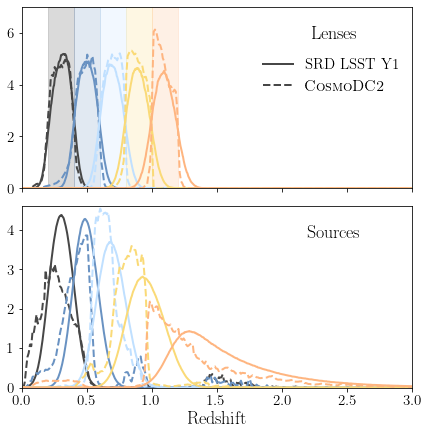

In [46]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharey=False, sharex=True)
plt.subplots_adjust(hspace = 0.1, wspace = 0)
#c = ["#FEB580", "#FADA77","#C0E0FF","#6992C2","#474747"]
c = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick', 'k' ]
zbins_l = [0.2, 0.4, 0.6, 0.8, 1., 1.2] 
zbins_s = [0.19285902, 0.40831394, 0.65503818, 0.94499109, 1.2947086, 1.72779632, 2.27855242, 3. ]  # 7 bins
#zbins_s = [0.25588604, 0.55455363, 0.91863365, 1.38232001, 2.] # 4 bins
fs = 15
#plt.xticks(fontsize = fs)
#plt.yticks(fontsize = fs)

plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

#ax[0].tick_params(axis='x', Labelsize= fs)

for i,nz in enumerate(nzs_l):
    zmean = np.trapz(nz*z_l, x=z_l)
    norm_c = np.trapz(nzs_l_c[i], x=z_l_c)
    print(zmean)
    if i ==0:
        ax[0].plot(z_l, nz, color = c[i], lw = 2., label = 'SRD LSST Y1')
        
        ax[0].plot(z_l_c, nzs_l_c[i]/norm_c, color = c[i], lw = 2., ls='--', label = r'$\textsc{CosmoDC2}$')
    if i>0:
        ax[0].plot(z_l, nz, color = c[i], lw = 2.)
        ax[0].plot(z_l_c, nzs_l_c[i]/norm_c, color = c[i], lw = 2., ls='--')
    ax[0].set_ylim(ymin=0, ymax=7)
    ax[0].set_xlim(xmin=0, xmax = 3.)    
    ax[0].axvspan(zbins_l[i], zbins_l[i+1], color = c[i], alpha = 0.2)
ax[0].text(0.8, 0.85, "Lenses", horizontalalignment='center',
                            verticalalignment='center', transform=ax[0].transAxes, fontsize=18)
ax[0].legend(frameon = False, fontsize = 15, loc = 'center right', bbox_to_anchor=(1., 0.62))   

for i,nz in enumerate(nzs_s):
    zmean = np.trapz(nz*z_s, x=z_s)
    print('Gauss sims:', zmean)
    norm_c = np.trapz(nzs_s_c[i], x=z_s_c)
    zmean = np.trapz(nzs_s_c[i]*z_s_c/norm_c, x=z_s_c)
    print('Cosmodc2:', zmean)
    
    
    ax[1].plot(z_s, nz, color = c[i], lw = 2.)
    ax[1].plot(z_s_c, nzs_s_c[i]/norm_c, color = c[i], lw = 2., ls='--')
    ax[1].set_ylim(ymin=0)
    ax[1].set_xlabel('Redshift', fontsize=18)
    #ax[1].axvspan(zbins_s[i], zbins_s[i+1], color = c[i], alpha = 0.2)
ax[1].text(0.8, 0.85, "Sources", horizontalalignment='center',
                              verticalalignment='center', transform=ax[1].transAxes, fontsize=18)

plt.savefig('../plots/nzs_srd_cosmocd2.png', pad_inches = 0.1, dpi = 300)
plt.savefig('../plots/nzs_srd_cosmodc2.pdf', pad_inches = 0.1, dpi = 300)